In [0]:
import numpy as np
import pandas as pd
import os
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree 


###Reading Fitbit's heart rate.
####The heart rate dataset has about 3.5 million records for 14 participants recording their heartbeat over a period of 2 months, every 6 times per minute.

In [0]:

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/heartrate_seconds_merged_1.csv"
file=requests.get(url).content
heart_1=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')


url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/heartrate_seconds_merged_2.csv"
file=requests.get(url).content
heart_2=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

heart = pd.concat([heart_1, heart_2], ignore_index=True)



In [19]:
heart.head()

,source,participant-id,timestamp,heart-rate
0,fitbit,2022484408,1.459497e+09,93
1,fitbit,2022484408,1.459497e+09,91
2,fitbit,2022484408,1.459497e+09,96
3,fitbit,2022484408,1.459497e+09,98
4,fitbit,2022484408,1.459497e+09,100


In [20]:


print(heart.shape)


(3638339, 4)


###Converting timestamp field into date format.-

In [0]:
from datetime import datetime

heart["date"]=pd.to_datetime(heart['timestamp'],unit='s').dt.date




###Previewing heart rate dataset

In [22]:
heart.head()

,source,participant-id,timestamp,heart-rate,date
0,fitbit,2022484408,1.459497e+09,93,2016-04-01
1,fitbit,2022484408,1.459497e+09,91,2016-04-01
2,fitbit,2022484408,1.459497e+09,96,2016-04-01
3,fitbit,2022484408,1.459497e+09,98,2016-04-01
4,fitbit,2022484408,1.459497e+09,100,2016-04-01


###Heart rate data at summary level by taking mean of heart-rate per day per participant

In [23]:
from datetime import datetime


heart_summ=heart.drop(['timestamp'],axis=1)

heart_mean=heart_summ.groupby(['date','participant-id']).mean().reset_index()



heart_mean.head()


,date,participant-id,heart-rate
0,2016-03-29,2347167796,71.264220
1,2016-03-30,2347167796,72.835195
2,2016-03-30,6962181067,74.983431
3,2016-03-31,2347167796,70.711957
4,2016-03-31,6962181067,80.819159


###Heart Rate histogram plot to visualize distribution of heart rate data.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Counts')

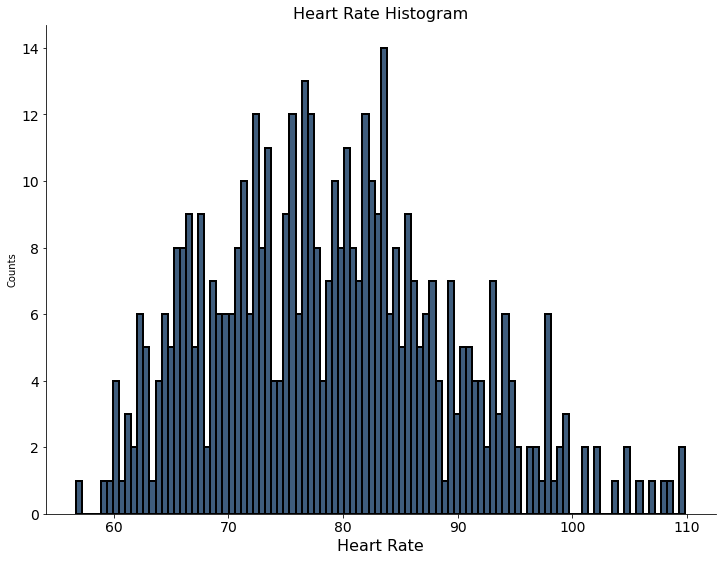

In [24]:
HR = heart_mean['heart-rate']
ST = heart_mean['participant-id']
plt.figure(figsize=(12, 9)) 
plt.hist(HR, range=(np.min(HR),np.max(HR)),
         linewidth=2,color="#3F5D7D", bins=100,edgecolor='black')
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  
plt.title('Heart Rate Histogram', fontsize=16)
plt.xlabel('Heart Rate', fontsize=16)
plt.ylabel('Counts')

###Visualizing histograms of individual participant's heart rate.

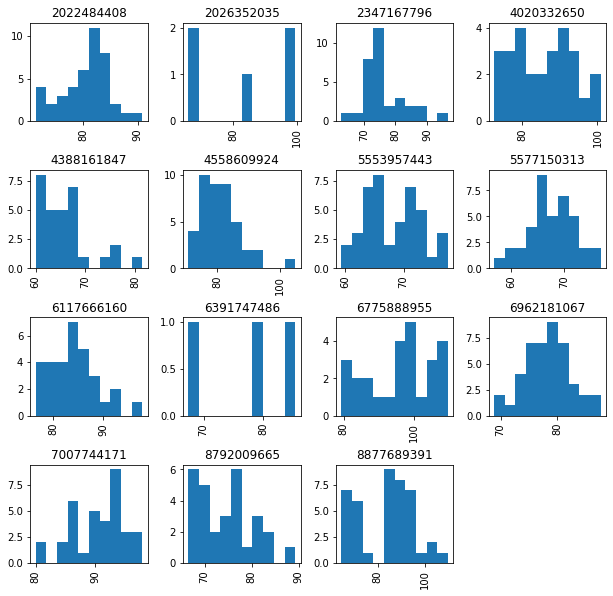

In [25]:
heart_mean['heart-rate'].hist(by=heart_mean['participant-id'],figsize=(10,10))

plt.show()


###Visualizing heart rate of a particular participant throughout a month.

Text(0, 0.5, 'Heart Rate')

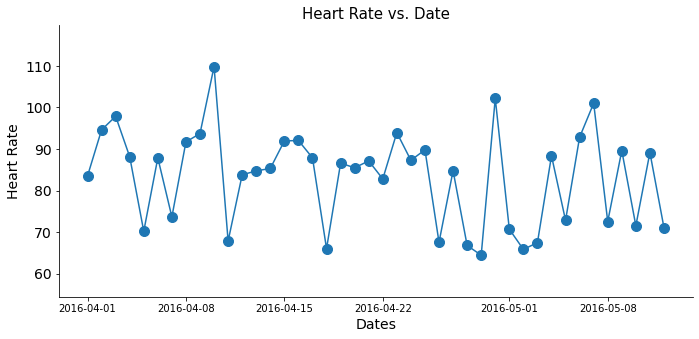

In [26]:
fig = plt.figure(figsize = (25,5))
ax = plt.subplot(121)  





Hourlydf = heart_summ[heart_summ['participant-id']==8877689391].groupby(by='date').mean()
meanHeart = Hourlydf['heart-rate']
plt.plot(meanHeart, linestyle='-', marker='o', markersize=10)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()
ax.set_ylim([np.min(meanHeart)-10, np.max(meanHeart)+10])
plt.xticks(fontsize=10)  
plt.yticks(fontsize=14)  
plt.title('Heart Rate vs. Date', fontsize=15)
plt.xlabel(meanHeart.index.name)
plt.xlabel('Dates', fontsize=14)
plt.ylabel('Heart Rate', fontsize=14)

###Reading Fitbit's daily activity data from repository for all the participants.

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/dailyActivity_merged_1.csv"
file=requests.get(url).content
dailyact_1=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/dailyActivity_merged_2.csv"
file=requests.get(url).content
dailyact_2=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

dailyact = pd.concat([dailyact_1, dailyact_2], ignore_index=True)


###Previewing the daily activity data.

In [28]:
dailyact.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


###Converting Activity Date in timestamp format to Date format

In [0]:
dailyact.head()

dailyact["date"]=pd.to_datetime(dailyact['ActivityDate']).dt.date



In [30]:
dailyact.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016-03-25
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016-03-26
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016-03-27
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016-03-28
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016-03-29


In [31]:
dailyact.shape

(1397, 16)

###Reading Fitbit's sleep data for all the participants from repository

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/project/sleepDay_merged.csv"
file=requests.get(url).content
sleep=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')




sleep["date"]=pd.to_datetime(sleep['SleepDay']).dt.date



In [33]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,date
0,1503960366,4/12/2016 12:00:00 AM,1,327,346,2016-04-12
1,1503960366,4/13/2016 12:00:00 AM,2,384,407,2016-04-13
2,1503960366,4/15/2016 12:00:00 AM,1,412,442,2016-04-15
3,1503960366,4/16/2016 12:00:00 AM,2,340,367,2016-04-16
4,1503960366,4/17/2016 12:00:00 AM,1,700,712,2016-04-17


In [34]:
sleep.shape

(413, 6)

In [0]:
sleep['TotalMinutesAwake']=sleep['TotalTimeInBed']-sleep['TotalMinutesAsleep']







###Sleep sample dataset for 1 participant. 
####Visualizing Minutes Asleep and Minutes Awake for 1 participant through a 1 month period.

In [0]:
sleep_sample = sleep[sleep['Id']==4445114986]

Text(0, 0.5, 'Minutes Awake')

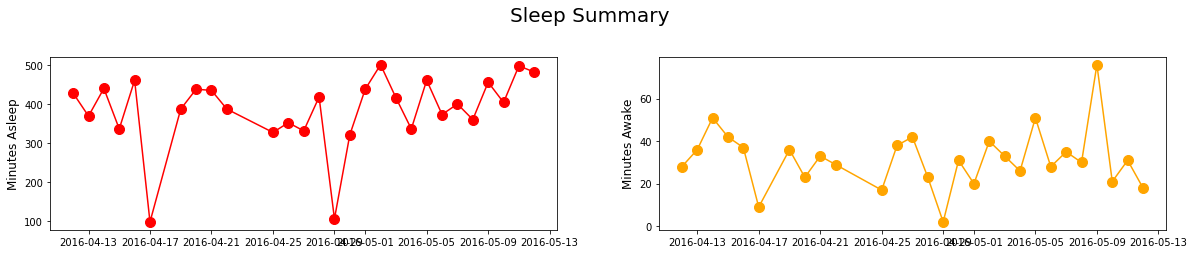

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20,7))
plt.suptitle('Sleep Summary', fontsize=20)

plt.subplot(2, 2, 1)
plt.plot(sleep_sample['date'],sleep_sample['TotalMinutesAsleep'], linestyle='-', marker='o', markersize=10, color='red')
plt.tick_params(labelbottom='off')
plt.ylabel('Minutes Asleep', fontsize=12) 

plt.subplot(2, 2, 2)
plt.plot(sleep_sample['date'],sleep_sample['TotalMinutesAwake'], linestyle='-', marker='o', markersize=10, color='orange')
plt.tick_params(labelbottom='off')
plt.ylabel('Minutes Awake', fontsize=12)

#Amalgamation
###Merging Fitbit's heart rate data with daily activity data of all particpants. Join based on participant ID and date.

In [0]:
heart_dailyact = dailyact.merge(heart_mean, how='inner', left_on=['Id','date'], right_on=['participant-id','date'])

In [39]:
print(heart_dailyact.shape)

heart_dailyact.head()

(478, 18)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,participant-id,heart-rate
0,2022484408,4/1/2016,13603,9.60,9.60,0.0,5.46,0.63,3.51,0.0,72,16,213,1139,2645,2016-04-01,2022484408,88.563916
1,2022484408,4/2/2016,5477,3.84,3.84,0.0,0.00,0.00,3.84,0.0,0,0,237,1203,2040,2016-04-02,2022484408,72.068685
2,2022484408,4/3/2016,11144,7.82,7.82,0.0,1.79,0.89,5.14,0.0,25,22,279,1114,2395,2016-04-03,2022484408,74.398232
3,2022484408,4/4/2016,15313,11.00,11.00,0.0,5.02,1.29,4.69,0.0,62,19,233,1126,2581,2016-04-04,2022484408,78.295372
4,2022484408,4/5/2016,10805,7.59,7.59,0.0,0.72,0.98,5.89,0.0,36,37,298,1069,2735,2016-04-05,2022484408,83.474328


#Amalgamation

###Merging Fitbit's Sleep data with amalgamated data above. Joining column is date and participant ID.

In [0]:
fitbit=heart_dailyact.merge(sleep, how='inner', left_on=['Id','date'], right_on=['Id','date'])

###Previewing Amalgamated Data.

In [41]:
fitbit.shape

(186, 23)

In [42]:
fitbit.head()


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,date,participant-id,heart-rate,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalMinutesAwake
0,4020332650,4/12/2016,8,0.01,0.01,0.0,0.00,0.00,0.01,0.0,0,0,1,321,446,2016-04-12,4020332650,79.349114,4/12/2016 12:00:00 AM,1,501,541,40
1,4020332650,4/12/2016,8539,6.12,6.12,0.0,0.15,0.24,5.68,0.0,4,15,331,712,3654,2016-04-12,4020332650,79.349114,4/12/2016 12:00:00 AM,1,501,541,40
2,5553957443,4/12/2016,3436,2.24,2.24,0.0,0.50,0.67,1.05,0.0,7,11,50,61,633,2016-04-12,5553957443,64.070330,4/12/2016 12:00:00 AM,1,441,464,23
3,5553957443,4/12/2016,11596,7.57,7.57,0.0,1.37,0.79,5.41,0.0,19,13,277,767,2026,2016-04-12,5553957443,64.070330,4/12/2016 12:00:00 AM,1,441,464,23
4,6962181067,4/12/2016,5893,3.90,3.90,0.0,2.88,0.56,0.46,0.0,43,9,48,146,917,2016-04-12,6962181067,86.082548,4/12/2016 12:00:00 AM,1,366,387,21


###Correlation plots to prepare feature list necessary for modeling.

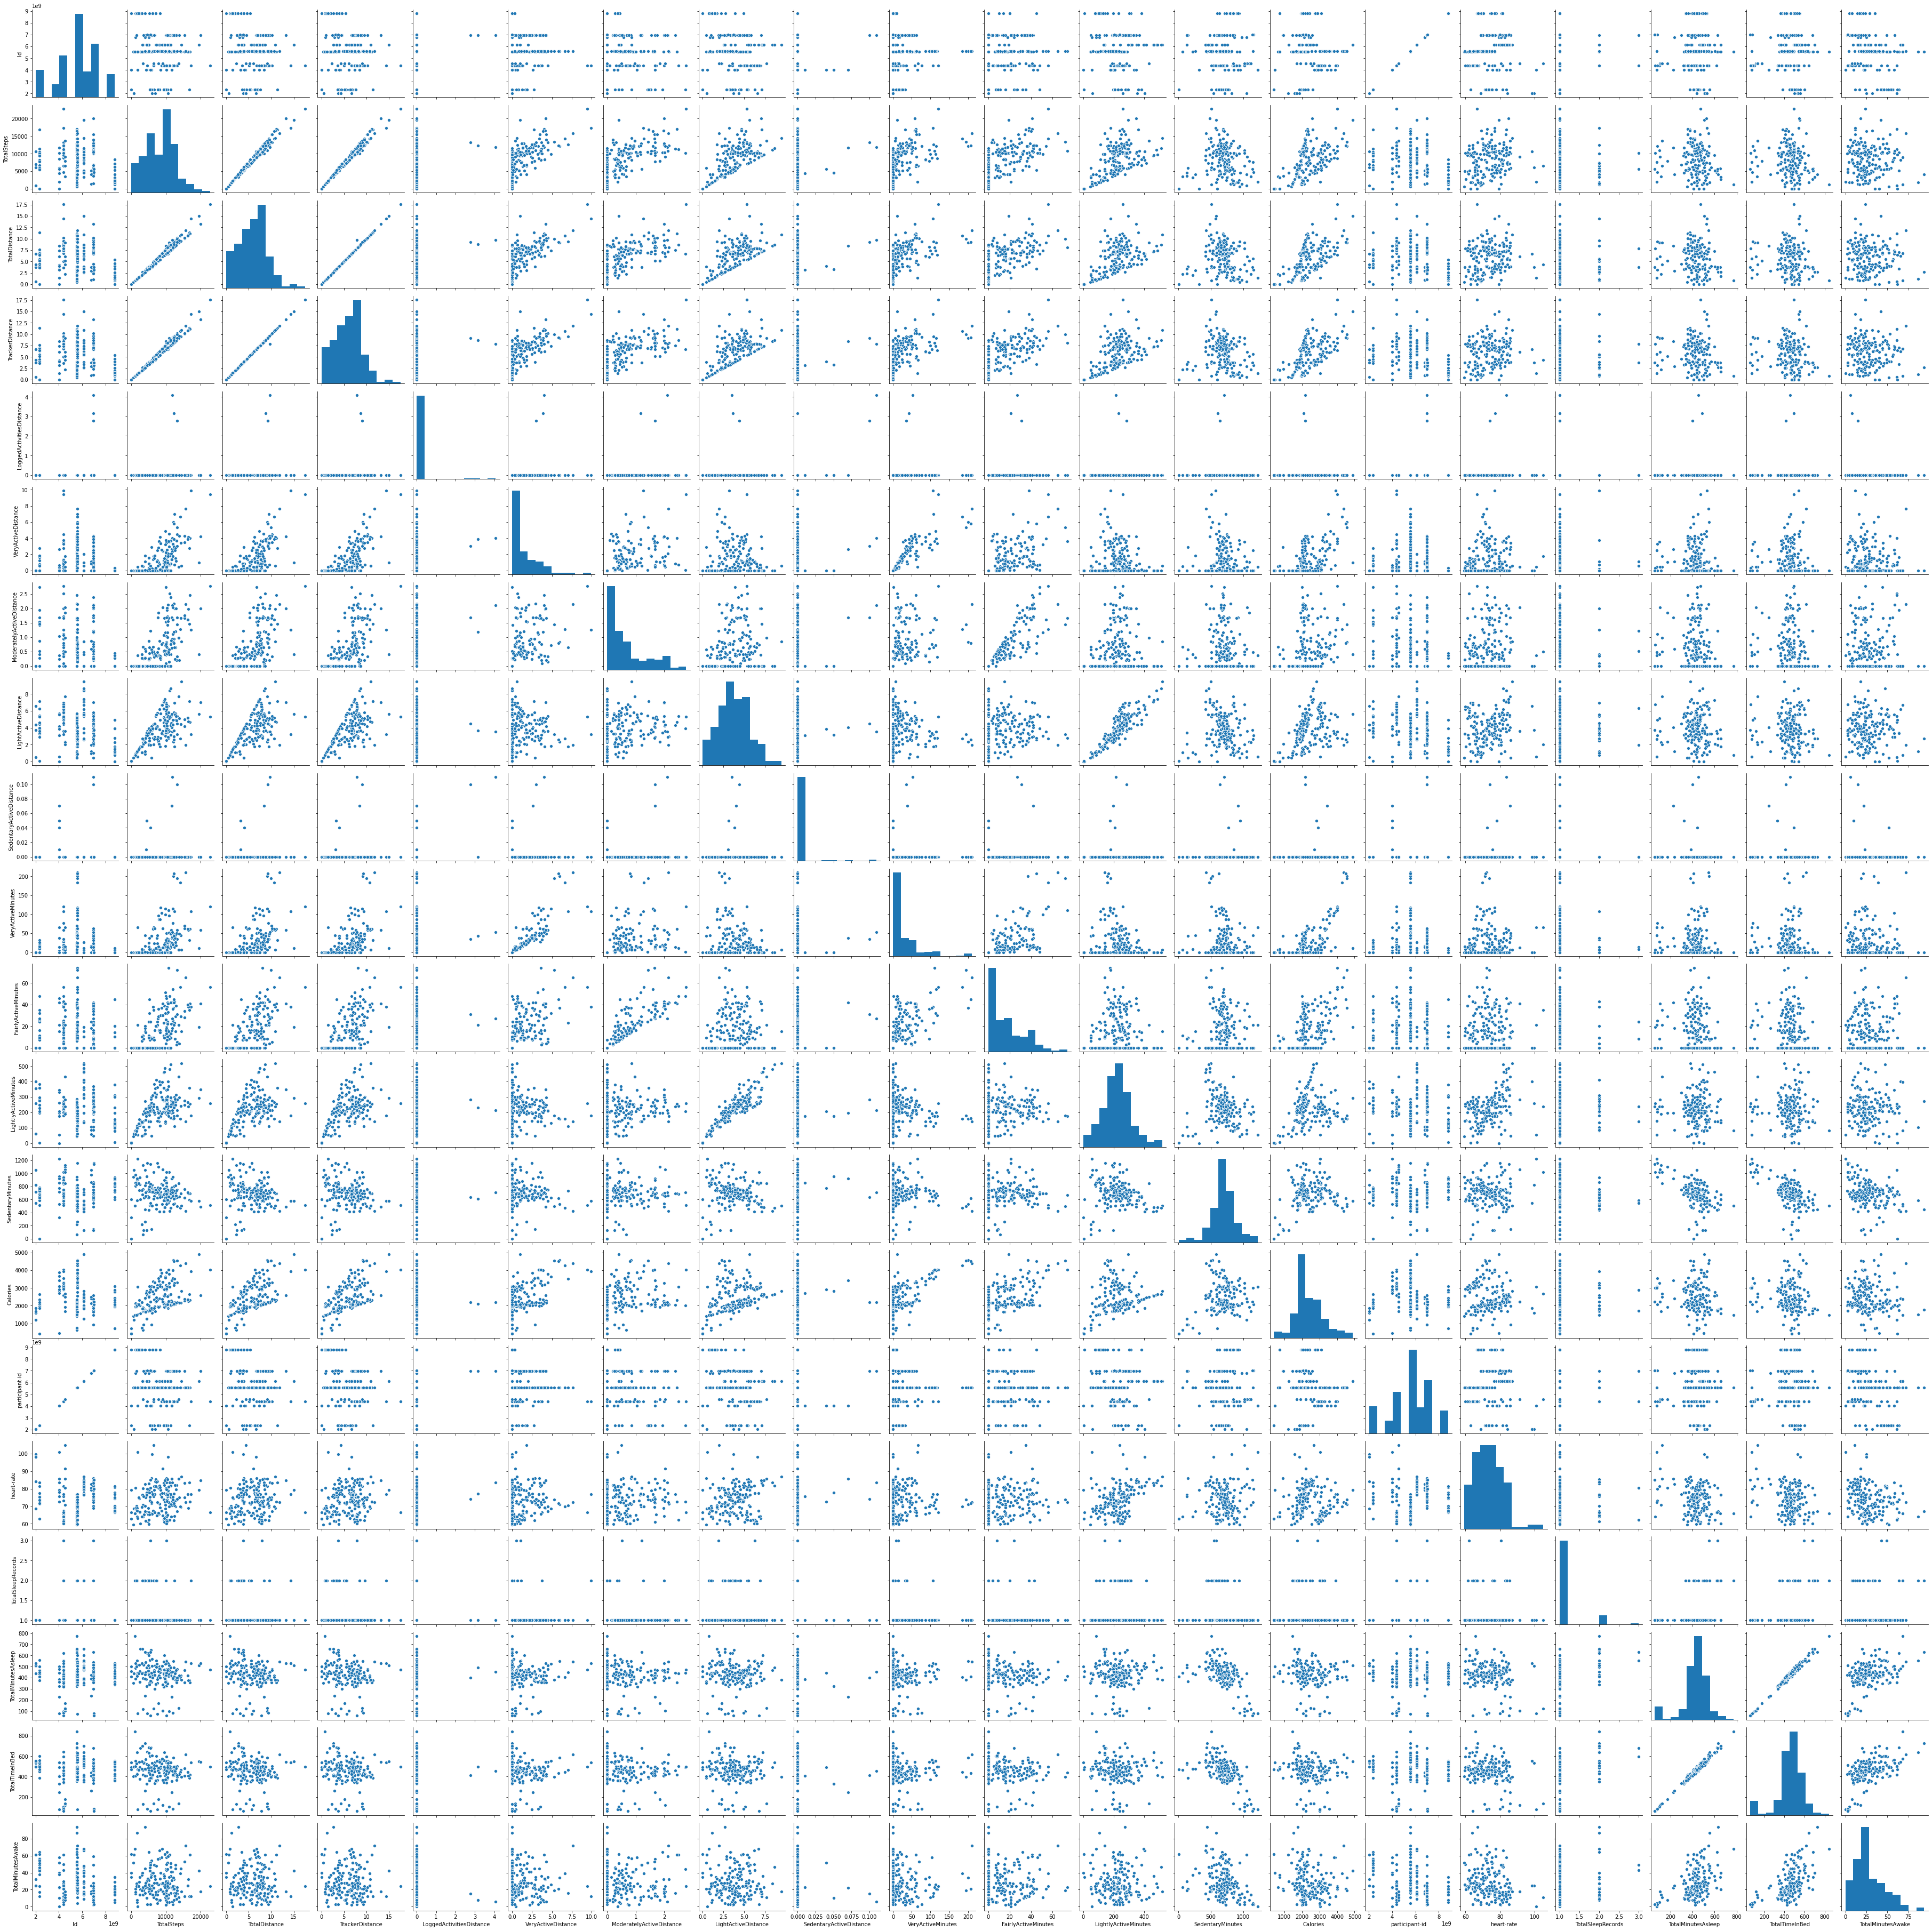

In [43]:
sns.pairplot(fitbit)

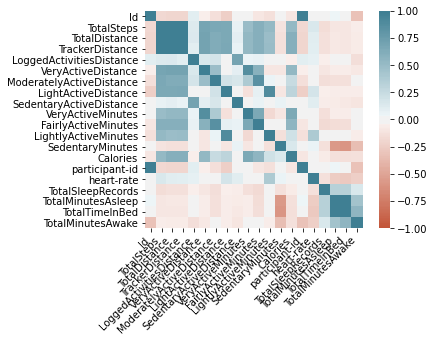

In [44]:
correlation = fitbit.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#Modeling

###Here we will look at ways how sleep and daily activity patterns of the participants emerge and their influence on their heart health.

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


###Feature selection: Dropping features with negative correlation.

####Considering all features contributing to lifestyle and setting prediction variable as heart rate.

In [0]:
model = LinearRegression()

features=fitbit.drop(['Id','participant-id','heart-rate','TotalSleepRecords','ActivityDate',\
                     'date','SleepDay','TotalMinutesAsleep','TotalMinutesAwake'],axis=1)

target=fitbit['heart-rate']



###Scaling the features before fitting the model.

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(features)

###Splitting the test/train data

In [0]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data_scaled,target,test_size=0.10,random_state=2)

###Model evaluation

In [49]:
model.fit(Xtrain,Ytrain)
y_pred=model.predict(Xtest)
from sklearn.metrics import mean_squared_error
res = mean_squared_error(y_pred, Ytest)
print(res)
model.score(Xtest,Ytest)

28.772651669883953


0.5383477182261691

###Predictions

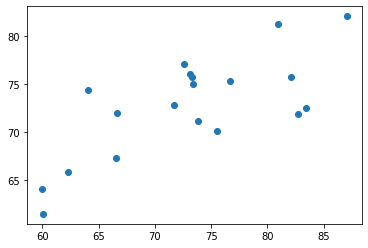

In [50]:
predictions = model.predict(Xtest)
plt.scatter(Ytest, predictions)


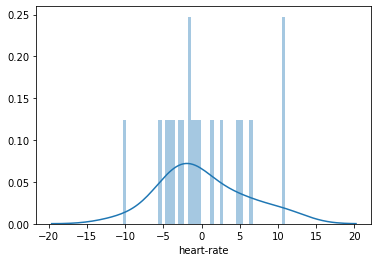

In [51]:
sns.distplot((Ytest-predictions),bins=50)